##*Elizabeth Torres Torrecillas* 

# *Evaluación 3*



---



---



---



In [72]:
#Importar bibliotecas a utilizar
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

La [Ecuación de Reacción-Difusión](https://en.wikipedia.org/wiki/Reaction–diffusion_system) en una dimensión está dada por la ecuación diferencial parcial

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos. 

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

\begin{equation*}
2 H_2 + O_2 \xrightarrow[\leftarrow]{}  2 H_2 O
\end{equation*}

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, 
siendo $\alpha$ el coeficiente de reacción. 

Entonces nos interesa resolver la ecuación

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u
\end{equation*}

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor. 

Supondremos que $D=1$ y $\alpha=-1$. 

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$
en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura


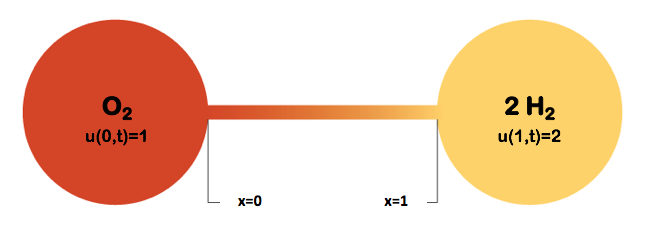


Se pide adaptar el código desarrolado en el sitio del curso de [Numerical Methods using Python](http://people.bu.edu/andasari/courses/numericalpython/python.html) del Dr. Vivi Andasari de la Universidad de Boston.

En la [sesión 15](http://people.bu.edu/andasari/courses/Fall2015/LectureNotes/Lecture15_29Oct2015.pdf), se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS).  Se provee el código para problemas de condiciones a la frontera [tipo Dirichlet](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py) y también para el [tipo Neumann](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_NeumannBCs.py).

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.  




---



---



**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


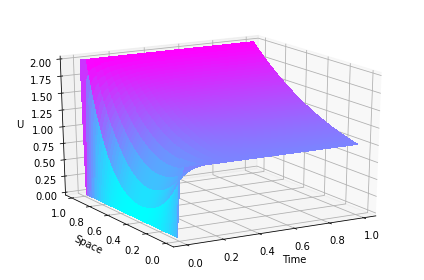

In [73]:
#Método de diferencias finitas con condiciones de frontera tipo Dirichlet
#Número de pasos
#En el intervalo espacial
M = 50 
#En el intervalo temporal
N = 60
#Intervalo en x
#Punto inicial en x
x0 = 0
#Longitud del tubo
xL = 1

# ----- Spatial discretization step -----
#Tamaño de paso espacial
dx = (xL - x0)/(M - 1)
#Intervalo de tiempo de interés
#Tiempo inicial
t0 = 0.0
#Tiempo final
tF = 1.0

# ----- Time step -----
#Tamaño de paso temporal
dt = (tF - t0)/(N - 1)
#Suponemos los valores:
#Coeficiente de difusión igual a 1
D = 1.0  
#Razón de reacción igual a -1
alpha = -1.0 

r = dt*D/dx**2
s = dt*alpha;

#Vector en x con M puntos
xspan = np.linspace(x0, xL, M)
#Vector en t con N puntos
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Condición inicial dadas en el problema 
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
#Condiciones de frontera dadas en el problema 
U[0,:] = 1.0 
U[-1,:] = 2.0

#Loop para la resolución del sistema
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.cool, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(20, -120)
plt.tight_layout()
plt.show()

* Comentarios sobre los resultados obtenidos

 Siendo $u$ la concentración del compuesto químico, notamos que el tubo comienza a llenarse de concentración rapidamente. Apreciamos que los valores extremos del tubo, siendo en $x0=0$ y $xL=1$, se mantiene constante en el tiempo. Entonces, el tubo cuando se comienza a llenar lo hace de ambos lados, el gas reacciona y después de un tiempo, vemos como este movimiento de llenado se va estabilizando la cantidad de concentración respecto al tiempo.



---



---



**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $$u(x,0) = 0$$ En $x=0$, el flujo de gas es $$\partial u/\partial x (0,t) = 0.1$$  y en $x=1$ el flujo $$\partial u/\partial x (1,t) = 0.2$$

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


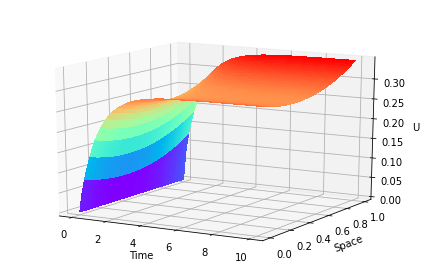

In [74]:
#Método de diferencias finitas con condiciones de frontera tipo Neumann
#Número de pasos
#En el intervalo espacial
M = 50 
#En el intervalo temporal
N = 60 
#Intervalo en x
#Punto inicial en x
x0 = 0
#Longitud del tubo
xL = 1

# ----- Spatial discretization step -----
#Tamaño de paso espacial
dx = (xL - x0)/(M - 1)
#Intervalo de tiempo de interés
#Tiempo inicial
t0 = 0.0
#Tiempo final
tF = 10.0

# ----- Time step -----
#Tamaño de paso temporal
dt = (tF - t0)/(N - 1)
#Suponemos los valores:
#Coeficiente de difusión igual a 1
D = 1.0  
#Razón de reacción igual a -1
alpha = -1.0 

r = dt*D/dx**2
s = dt*alpha;

#Vector en x con M puntos
xspan = np.linspace(x0, xL, M)
#Vector en t con N puntos
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Condición inicial dadas en el problema 
U[:,0] = 0.0

#----- Neumann boundary conditions -----
#Hicimos un arreglo para que sea del mismo tamaño que leftBC
f = 0.1*np.ones([N +1,1])
#Hicimos un arreglo para que sea del mismo tamaño que rightBC
g = 0.2 *np.ones([N+1,1])

#Loop para la resolución del sistema
for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.rainbow, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(15, -60)
plt.tight_layout()
plt.show()

* Comentarios sobre los resultados obtenidos

   Siendo $u$ la concentración del compuesto químico, notamos que el tubo comienza a llenarse de concentración rapidamente. Además, podemos apreciar que de un lado del tubo, dicho aumento de la concentración es mayor respecto al otro extremo, esto se encuentra relacionado con las condiciones de frontera tipo Neumann dados para este problema. Después de un tiempo, vemos como la concentración respecto al tiempo se va estabilizando.



---



---



**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


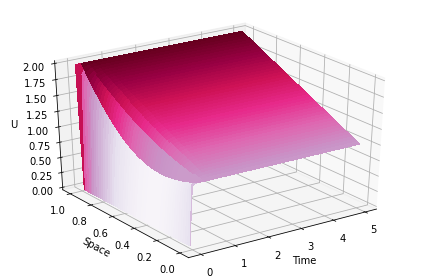

In [75]:
#Método de diferencias finitas con condiciones de frontera tipo Dirichlet
#Número de pasos
#En el intervalo espacial
M = 50 
#En el intervalo temporal
N = 60
#Intervalo en x
#Punto inicial en x
x0 = 0
#Longitud del tubo
xL = 1

# ----- Spatial discretization step -----
#Tamaño de paso espacial
dx = (xL - x0)/(M - 1)
#Intervalo de tiempo de interés
#Tiempo inicial
t0 = 0
#Tiempo final
tF = 5.0

# ----- Time step -----
#Tamaño de paso temporal
dt = (tF - t0)/(N - 1)

#Suponemos los valores:
#Coeficiente de difusión igual a 1
D = 1.0 
#Razón de reacción igual a 0
alpha = 0 

r = dt*D/dx**2
s = dt*alpha;

#Vector en x con M puntos
xspan = np.linspace(x0, xL, M)
#Vector en t con N puntos
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Condición inicial dadas en el problema 
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
#Condiciones de frontera dadas en el problema 
U[0,:] = 1.0 
U[-1,:] = 2.0

#Loop para la resolución del sistema
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(30, -125)
plt.tight_layout()
plt.show()

* Comentarios sobre los resultados obtenidos

 Siendo $u$ la concentración del compuesto químico, notamos que  el tubo comienza a llenarse de concentración rapidamente. Apreciamos que los valores extremos del tubo, siendo en $x0=0$ y $xL=1$, se mantiene constante en el tiempo.

  Despúes de un tiempo vemos como este movimiento de llenado se va estabilizando la cantidad de concentración respecto al tiempo. Ahora, si tomamos en cuenta que una de las condiciones iniciales es $\alpha=0 $, entonces sabemos que los dos gases no reaccionan entre sí, son inertes entre sí. De forma que si lo comparamos con un alpha mayor a 0, tenemos que entre mayor sera el alpha, más les cuesta llegar a una estabilidad de la cantidad de concentración espacialmente respecto al tiempo.
  Es importante notar que aunque sean inertes, se mantienen las diferencias de concentración entre los extremos del tubo, ya que las sustancias en estudio son distintas.



---



---

